## Загрузка пакетов

In [7]:
from importlib import reload
import torch
import torch.nn as nn
import dataset
reload(dataset)
import supernet
reload(supernet)
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Загрузка датасета MNIST с помощью файла dataset

In [8]:
dataset_train, dataset_valid = dataset.get_dataset()

batch_size = 100 
train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size,shuffle=True) 
test_loader = DataLoader(dataset=dataset_valid, batch_size=batch_size, shuffle=False)

## Создание экземпляра supernet (класс описан в файле supernet)

In [9]:
supernet = supernet.SuperNet()
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Обучение суперсети целиком

In [4]:
supernet.weights_init()
loss_lists, acc_lists = supernet.train(train_loader, num_epochs=10)

Epoch [1/10], Step [300/600], Loss: 1.9719, Accuracy: 36.00%
Epoch [1/10], Step [600/600], Loss: 2.0550, Accuracy: 30.00%
Epoch [2/10], Step [300/600], Loss: 1.6679, Accuracy: 56.00%
Epoch [2/10], Step [600/600], Loss: 1.6341, Accuracy: 59.00%
Epoch [3/10], Step [300/600], Loss: 1.7593, Accuracy: 35.00%
Epoch [3/10], Step [600/600], Loss: 1.6345, Accuracy: 50.00%
Epoch [4/10], Step [300/600], Loss: 1.6677, Accuracy: 48.00%
Epoch [4/10], Step [600/600], Loss: 1.5407, Accuracy: 61.00%
Epoch [5/10], Step [300/600], Loss: 1.5141, Accuracy: 58.00%
Epoch [5/10], Step [600/600], Loss: 1.4200, Accuracy: 61.00%
Epoch [6/10], Step [300/600], Loss: 1.3962, Accuracy: 61.00%
Epoch [6/10], Step [600/600], Loss: 1.3457, Accuracy: 71.00%
Epoch [7/10], Step [300/600], Loss: 1.1615, Accuracy: 73.00%
Epoch [7/10], Step [600/600], Loss: 1.2807, Accuracy: 64.00%
Epoch [8/10], Step [300/600], Loss: 1.2648, Accuracy: 65.00%
Epoch [8/10], Step [600/600], Loss: 1.0252, Accuracy: 74.00%
Epoch [9/10], Step [300/

### Валидация

In [6]:
supernet.validate_sample((0, 0), test_loader)
supernet.validate_sample((0, 1), test_loader)
supernet.validate_sample((0, 2), test_loader)
supernet.validate_sample((1, 0), test_loader)
supernet.validate_sample((1, 1), test_loader)
supernet.validate_sample((1, 2), test_loader)
supernet.validate_sample((2, 0), test_loader)
supernet.validate_sample((2, 1), test_loader)
supernet.validate_sample((2, 2), test_loader)
supernet.validate_ensemble(test_loader)

Test Accuracy of the model (0, 0) on the 10000 test images: 75.33999999999999 %
Test Accuracy of the model (0, 1) on the 10000 test images: 79.45 %
Test Accuracy of the model (0, 2) on the 10000 test images: 79.01 %
Test Accuracy of the model (1, 0) on the 10000 test images: 79.2 %
Test Accuracy of the model (1, 1) on the 10000 test images: 78.2 %
Test Accuracy of the model (1, 2) on the 10000 test images: 80.58 %
Test Accuracy of the model (2, 0) on the 10000 test images: 79.03999999999999 %
Test Accuracy of the model (2, 1) on the 10000 test images: 80.69 %
Test Accuracy of the model (2, 2) on the 10000 test images: 80.58 %
Test Accuracy of the ensemle on the 10000 test images: 82.96 %


### Графики обучения

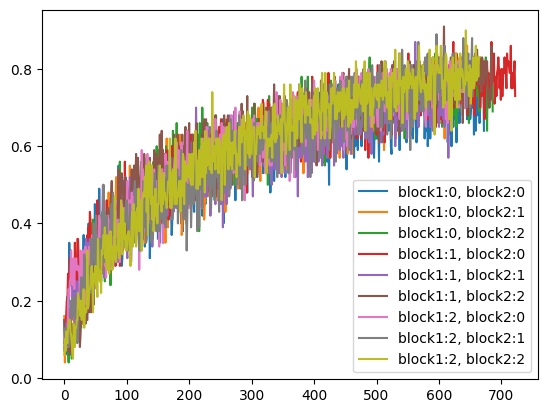

In [5]:
fig = plt.figsize=(20, 15)
for x in range(3):
    for y in range(3):
        plt.plot(range(len(acc_lists[x * 3 + y])), acc_lists[x * 3 + y], lw=1.5, label=f"block1:{x}, block2:{y}")
plt.legend()
plt.savefig('images/graph_together.jpg', dpi=300, format='jpg')

## Обучение сети по отдельным экземплярам

In [153]:
loss_lists_apart = [[] for _ in range(9)]
acc_lists_apart = [[] for _ in range(9)]

In [154]:
x, y = 0, 0
supernet.weights_init()
loss_lists_apart[x * 3 + y], acc_lists_apart[x * 3 + y] = supernet.train_sample((x, y), train_loader, num_epochs=10, process=True)
supernet.validate_sample((x, y), test_loader)

Epoch [1/10], Step [300/600], Loss: 1.6725, Accuracy: 48.00%
Epoch [1/10], Step [600/600], Loss: 1.2677, Accuracy: 75.00%
Epoch [2/10], Step [300/600], Loss: 1.0761, Accuracy: 77.00%
Epoch [2/10], Step [600/600], Loss: 0.7993, Accuracy: 91.00%
Epoch [3/10], Step [300/600], Loss: 0.7097, Accuracy: 90.00%
Epoch [3/10], Step [600/600], Loss: 0.6598, Accuracy: 92.00%
Epoch [4/10], Step [300/600], Loss: 0.5854, Accuracy: 89.00%
Epoch [4/10], Step [600/600], Loss: 0.5286, Accuracy: 91.00%
Epoch [5/10], Step [300/600], Loss: 0.4522, Accuracy: 90.00%
Epoch [5/10], Step [600/600], Loss: 0.3214, Accuracy: 98.00%
Epoch [6/10], Step [300/600], Loss: 0.3993, Accuracy: 93.00%
Epoch [6/10], Step [600/600], Loss: 0.3848, Accuracy: 90.00%
Epoch [7/10], Step [300/600], Loss: 0.3878, Accuracy: 93.00%
Epoch [7/10], Step [600/600], Loss: 0.2279, Accuracy: 98.00%
Epoch [8/10], Step [300/600], Loss: 0.2443, Accuracy: 95.00%
Epoch [8/10], Step [600/600], Loss: 0.2416, Accuracy: 97.00%
Epoch [9/10], Step [300/

In [155]:
x, y = 0, 1
supernet.weights_init()
loss_lists_apart[x * 3 + y], acc_lists_apart[x * 3 + y] = supernet.train_sample((x, y), train_loader, num_epochs=10, process=True)
supernet.validate_sample((x, y), test_loader)

Epoch [1/10], Step [300/600], Loss: 1.6651, Accuracy: 63.00%
Epoch [1/10], Step [600/600], Loss: 1.3148, Accuracy: 70.00%
Epoch [2/10], Step [300/600], Loss: 1.0397, Accuracy: 81.00%
Epoch [2/10], Step [600/600], Loss: 0.8208, Accuracy: 89.00%
Epoch [3/10], Step [300/600], Loss: 0.6786, Accuracy: 92.00%
Epoch [3/10], Step [600/600], Loss: 0.6894, Accuracy: 86.00%
Epoch [4/10], Step [300/600], Loss: 0.6111, Accuracy: 91.00%
Epoch [4/10], Step [600/600], Loss: 0.5273, Accuracy: 91.00%
Epoch [5/10], Step [300/600], Loss: 0.5055, Accuracy: 89.00%
Epoch [5/10], Step [600/600], Loss: 0.3642, Accuracy: 96.00%
Epoch [6/10], Step [300/600], Loss: 0.3258, Accuracy: 95.00%
Epoch [6/10], Step [600/600], Loss: 0.4670, Accuracy: 91.00%
Epoch [7/10], Step [300/600], Loss: 0.3032, Accuracy: 92.00%
Epoch [7/10], Step [600/600], Loss: 0.2616, Accuracy: 96.00%
Epoch [8/10], Step [300/600], Loss: 0.2286, Accuracy: 95.00%
Epoch [8/10], Step [600/600], Loss: 0.2587, Accuracy: 96.00%
Epoch [9/10], Step [300/

In [156]:
x, y = 0, 2
supernet.weights_init()
loss_lists_apart[x * 3 + y], acc_lists_apart[x * 3 + y] = supernet.train_sample((x, y), train_loader, num_epochs=10, process=True)
supernet.validate_sample((x, y), test_loader)

Epoch [1/10], Step [300/600], Loss: 1.6789, Accuracy: 58.00%
Epoch [1/10], Step [600/600], Loss: 1.2372, Accuracy: 77.00%
Epoch [2/10], Step [300/600], Loss: 1.0933, Accuracy: 80.00%
Epoch [2/10], Step [600/600], Loss: 0.7913, Accuracy: 88.00%
Epoch [3/10], Step [300/600], Loss: 0.7099, Accuracy: 91.00%
Epoch [3/10], Step [600/600], Loss: 0.6335, Accuracy: 93.00%
Epoch [4/10], Step [300/600], Loss: 0.5480, Accuracy: 95.00%
Epoch [4/10], Step [600/600], Loss: 0.4102, Accuracy: 96.00%
Epoch [5/10], Step [300/600], Loss: 0.3450, Accuracy: 96.00%
Epoch [5/10], Step [600/600], Loss: 0.3618, Accuracy: 96.00%
Epoch [6/10], Step [300/600], Loss: 0.3470, Accuracy: 96.00%
Epoch [6/10], Step [600/600], Loss: 0.2546, Accuracy: 95.00%
Epoch [7/10], Step [300/600], Loss: 0.3168, Accuracy: 94.00%
Epoch [7/10], Step [600/600], Loss: 0.2472, Accuracy: 96.00%
Epoch [8/10], Step [300/600], Loss: 0.2365, Accuracy: 95.00%
Epoch [8/10], Step [600/600], Loss: 0.1941, Accuracy: 96.00%
Epoch [9/10], Step [300/

In [157]:
x, y = 1, 0
supernet.weights_init()
loss_lists_apart[x * 3 + y], acc_lists_apart[x * 3 + y] = supernet.train_sample((x, y), train_loader, num_epochs=10, process=True)
supernet.validate_sample((x, y), test_loader)

Epoch [1/10], Step [300/600], Loss: 1.5234, Accuracy: 66.00%
Epoch [1/10], Step [600/600], Loss: 1.1357, Accuracy: 82.00%
Epoch [2/10], Step [300/600], Loss: 0.9016, Accuracy: 87.00%
Epoch [2/10], Step [600/600], Loss: 0.7290, Accuracy: 90.00%
Epoch [3/10], Step [300/600], Loss: 0.6466, Accuracy: 89.00%
Epoch [3/10], Step [600/600], Loss: 0.5062, Accuracy: 93.00%
Epoch [4/10], Step [300/600], Loss: 0.4515, Accuracy: 91.00%
Epoch [4/10], Step [600/600], Loss: 0.3996, Accuracy: 95.00%
Epoch [5/10], Step [300/600], Loss: 0.3316, Accuracy: 96.00%
Epoch [5/10], Step [600/600], Loss: 0.2841, Accuracy: 97.00%
Epoch [6/10], Step [300/600], Loss: 0.3628, Accuracy: 90.00%
Epoch [6/10], Step [600/600], Loss: 0.2515, Accuracy: 96.00%
Epoch [7/10], Step [300/600], Loss: 0.2128, Accuracy: 96.00%
Epoch [7/10], Step [600/600], Loss: 0.2023, Accuracy: 97.00%
Epoch [8/10], Step [300/600], Loss: 0.2420, Accuracy: 96.00%
Epoch [8/10], Step [600/600], Loss: 0.2147, Accuracy: 95.00%
Epoch [9/10], Step [300/

In [158]:
x, y = 1, 1
supernet.weights_init()
loss_lists_apart[x * 3 + y], acc_lists_apart[x * 3 + y] = supernet.train_sample((x, y), train_loader, num_epochs=10, process=True)
supernet.validate_sample((x, y), test_loader)

Epoch [1/10], Step [300/600], Loss: 1.6379, Accuracy: 57.00%
Epoch [1/10], Step [600/600], Loss: 1.2905, Accuracy: 81.00%
Epoch [2/10], Step [300/600], Loss: 0.9038, Accuracy: 95.00%
Epoch [2/10], Step [600/600], Loss: 0.7471, Accuracy: 91.00%
Epoch [3/10], Step [300/600], Loss: 0.6685, Accuracy: 93.00%
Epoch [3/10], Step [600/600], Loss: 0.6074, Accuracy: 84.00%
Epoch [4/10], Step [300/600], Loss: 0.5485, Accuracy: 91.00%
Epoch [4/10], Step [600/600], Loss: 0.3599, Accuracy: 95.00%
Epoch [5/10], Step [300/600], Loss: 0.2780, Accuracy: 98.00%
Epoch [5/10], Step [600/600], Loss: 0.2685, Accuracy: 98.00%
Epoch [6/10], Step [300/600], Loss: 0.2659, Accuracy: 94.00%
Epoch [6/10], Step [600/600], Loss: 0.2842, Accuracy: 93.00%
Epoch [7/10], Step [300/600], Loss: 0.2926, Accuracy: 91.00%
Epoch [7/10], Step [600/600], Loss: 0.2767, Accuracy: 93.00%
Epoch [8/10], Step [300/600], Loss: 0.2385, Accuracy: 91.00%
Epoch [8/10], Step [600/600], Loss: 0.1893, Accuracy: 96.00%
Epoch [9/10], Step [300/

In [159]:
x, y = 1, 2
supernet.weights_init()
loss_lists_apart[x * 3 + y], acc_lists_apart[x * 3 + y] = supernet.train_sample((x, y), train_loader, num_epochs=10, process=True)
supernet.validate_sample((x, y), test_loader)

Epoch [1/10], Step [300/600], Loss: 1.6037, Accuracy: 64.00%
Epoch [1/10], Step [600/600], Loss: 1.3087, Accuracy: 81.00%
Epoch [2/10], Step [300/600], Loss: 1.0599, Accuracy: 85.00%
Epoch [2/10], Step [600/600], Loss: 0.7823, Accuracy: 92.00%
Epoch [3/10], Step [300/600], Loss: 0.7494, Accuracy: 89.00%
Epoch [3/10], Step [600/600], Loss: 0.5851, Accuracy: 91.00%
Epoch [4/10], Step [300/600], Loss: 0.5184, Accuracy: 90.00%
Epoch [4/10], Step [600/600], Loss: 0.4600, Accuracy: 93.00%
Epoch [5/10], Step [300/600], Loss: 0.3643, Accuracy: 96.00%
Epoch [5/10], Step [600/600], Loss: 0.2965, Accuracy: 98.00%
Epoch [6/10], Step [300/600], Loss: 0.3011, Accuracy: 95.00%
Epoch [6/10], Step [600/600], Loss: 0.2276, Accuracy: 98.00%
Epoch [7/10], Step [300/600], Loss: 0.2686, Accuracy: 95.00%
Epoch [7/10], Step [600/600], Loss: 0.1784, Accuracy: 98.00%
Epoch [8/10], Step [300/600], Loss: 0.2219, Accuracy: 96.00%
Epoch [8/10], Step [600/600], Loss: 0.2041, Accuracy: 96.00%
Epoch [9/10], Step [300/

In [160]:
x, y = 2, 0
supernet.weights_init()
loss_lists_apart[x * 3 + y], acc_lists_apart[x * 3 + y] = supernet.train_sample((x, y), train_loader, num_epochs=10, process=True)
supernet.validate_sample((x, y), test_loader)

Epoch [1/10], Step [300/600], Loss: 1.6738, Accuracy: 49.00%
Epoch [1/10], Step [600/600], Loss: 1.2807, Accuracy: 75.00%
Epoch [2/10], Step [300/600], Loss: 0.9452, Accuracy: 90.00%
Epoch [2/10], Step [600/600], Loss: 0.8013, Accuracy: 90.00%
Epoch [3/10], Step [300/600], Loss: 0.6240, Accuracy: 92.00%
Epoch [3/10], Step [600/600], Loss: 0.4917, Accuracy: 93.00%
Epoch [4/10], Step [300/600], Loss: 0.4239, Accuracy: 94.00%
Epoch [4/10], Step [600/600], Loss: 0.4020, Accuracy: 95.00%
Epoch [5/10], Step [300/600], Loss: 0.4996, Accuracy: 91.00%
Epoch [5/10], Step [600/600], Loss: 0.3371, Accuracy: 92.00%
Epoch [6/10], Step [300/600], Loss: 0.2934, Accuracy: 94.00%
Epoch [6/10], Step [600/600], Loss: 0.2064, Accuracy: 96.00%
Epoch [7/10], Step [300/600], Loss: 0.2824, Accuracy: 96.00%
Epoch [7/10], Step [600/600], Loss: 0.2209, Accuracy: 97.00%
Epoch [8/10], Step [300/600], Loss: 0.2552, Accuracy: 94.00%
Epoch [8/10], Step [600/600], Loss: 0.2331, Accuracy: 94.00%
Epoch [9/10], Step [300/

In [161]:
x, y = 2, 1
supernet.weights_init()
loss_lists_apart[x * 3 + y], acc_lists_apart[x * 3 + y] = supernet.train_sample((x, y), train_loader, num_epochs=10, process=True)
supernet.validate_sample((x, y), test_loader)

Epoch [1/10], Step [300/600], Loss: 1.5490, Accuracy: 67.00%
Epoch [1/10], Step [600/600], Loss: 1.2549, Accuracy: 72.00%
Epoch [2/10], Step [300/600], Loss: 0.9423, Accuracy: 87.00%
Epoch [2/10], Step [600/600], Loss: 0.7854, Accuracy: 85.00%
Epoch [3/10], Step [300/600], Loss: 0.6722, Accuracy: 86.00%
Epoch [3/10], Step [600/600], Loss: 0.4294, Accuracy: 92.00%
Epoch [4/10], Step [300/600], Loss: 0.4108, Accuracy: 91.00%
Epoch [4/10], Step [600/600], Loss: 0.3968, Accuracy: 95.00%
Epoch [5/10], Step [300/600], Loss: 0.3497, Accuracy: 92.00%
Epoch [5/10], Step [600/600], Loss: 0.3357, Accuracy: 94.00%
Epoch [6/10], Step [300/600], Loss: 0.2662, Accuracy: 95.00%
Epoch [6/10], Step [600/600], Loss: 0.3795, Accuracy: 89.00%
Epoch [7/10], Step [300/600], Loss: 0.2171, Accuracy: 98.00%
Epoch [7/10], Step [600/600], Loss: 0.3512, Accuracy: 93.00%
Epoch [8/10], Step [300/600], Loss: 0.1952, Accuracy: 95.00%
Epoch [8/10], Step [600/600], Loss: 0.1944, Accuracy: 96.00%
Epoch [9/10], Step [300/

In [162]:
x, y = 2, 2
supernet.weights_init()
loss_lists_apart[x * 3 + y], acc_lists_apart[x * 3 + y] = supernet.train_sample((x, y), train_loader, num_epochs=10, process=True)
supernet.validate_sample((x, y), test_loader)

Epoch [1/10], Step [300/600], Loss: 1.5311, Accuracy: 71.00%
Epoch [1/10], Step [600/600], Loss: 1.1675, Accuracy: 80.00%
Epoch [2/10], Step [300/600], Loss: 0.9316, Accuracy: 84.00%
Epoch [2/10], Step [600/600], Loss: 0.7073, Accuracy: 85.00%
Epoch [3/10], Step [300/600], Loss: 0.5734, Accuracy: 93.00%
Epoch [3/10], Step [600/600], Loss: 0.5220, Accuracy: 93.00%
Epoch [4/10], Step [300/600], Loss: 0.4118, Accuracy: 95.00%
Epoch [4/10], Step [600/600], Loss: 0.3172, Accuracy: 98.00%
Epoch [5/10], Step [300/600], Loss: 0.3550, Accuracy: 93.00%
Epoch [5/10], Step [600/600], Loss: 0.3184, Accuracy: 94.00%
Epoch [6/10], Step [300/600], Loss: 0.2433, Accuracy: 96.00%
Epoch [6/10], Step [600/600], Loss: 0.1998, Accuracy: 99.00%
Epoch [7/10], Step [300/600], Loss: 0.2330, Accuracy: 95.00%
Epoch [7/10], Step [600/600], Loss: 0.1464, Accuracy: 98.00%
Epoch [8/10], Step [300/600], Loss: 0.1576, Accuracy: 98.00%
Epoch [8/10], Step [600/600], Loss: 0.1968, Accuracy: 94.00%
Epoch [9/10], Step [300/

### Графики обучения сетей

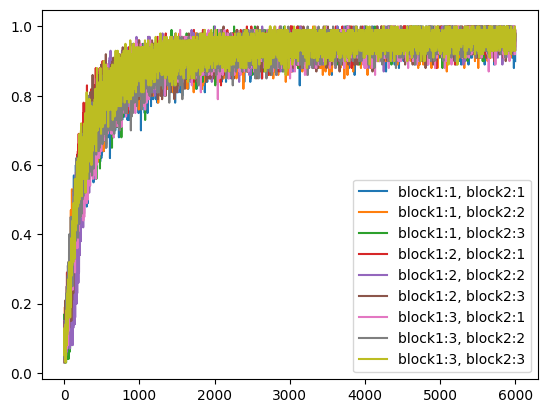

In [165]:
fig = plt.figsize=(20, 15)
for x in range(3):
    for y in range(3):
        plt.plot(range(len(acc_lists_apart[x * 3 + y])), acc_lists_apart[x * 3 + y], lw=1.5, label=f"block1:{x + 1}, block2:{y + 1}")
plt.legend()
plt.savefig('images/graph_apart.jpg', dpi=300, format='jpg')